## Homework 2

#### John Stachurski

OSM 2018

In [1]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt
from ipywidgets import interact

### Exercise 1

Write your own version of a one dimensional [kernel density estimator](https://en.wikipedia.org/wiki/Kernel_density_estimation), which estimates a density from a sample.

Write it as a class that takes the data $X$ and bandwidth $h$ when initialized and provides a method $f$ such that

$$
    f(x) = \frac{1}{hn} \sum_{i=1}^n 
    K \left( \frac{x-X_i}{h} \right)
$$

For $K$ use the Gaussian kernel ($K$ is the standard normal density).

Write the class so that the bandwidth defaults to Silverman's rule (see the "rule of thumb" discussion on [this page](https://en.wikipedia.org/wiki/Kernel_density_estimation)).  Test the class you have written by going through the steps

1. simulate data $X_1, \ldots, X_n$ from distribution $\phi$
2. plot the kernel density estimate over a suitable range
2. plot the density of $\phi$ on the same figure

for distributions $\phi$ of the following types


* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 2$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = 2$ and $\beta = 5$
* [beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with $\alpha = \beta = 0.5$

Use $n=100$.

Make a comment on your results.  (Do you think this is a good estimator of these distributions?)

In [2]:
class KDE:
    
    def __init__(self, X, h=None):
        
        X = np.array(X)
        self.X = X
        self.h = h
        σ_hat = X.std()
        self.n = len(X)
        
        if h is None:
            self.h = ((4 * σ_hat**5) / (3 * self.n))**(1/5)
            
    def f(self, x):
        
        h, n, X = self.h, self.n, self.X
        x = np.array(x)        
        f_x = np.empty(len(x))
        
        for i, x_i in enumerate(x):    
            f_x[i] = np.sum(norm.pdf((x_i - X) / h))
                
        return f_x / (h * n)

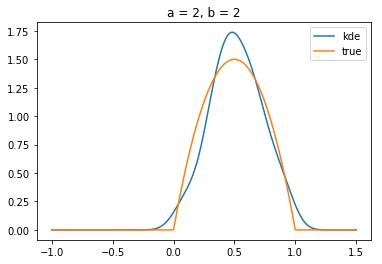

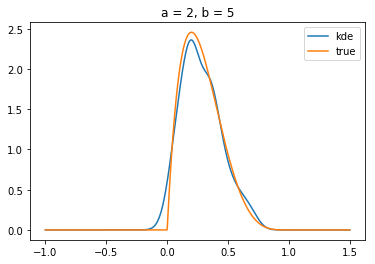

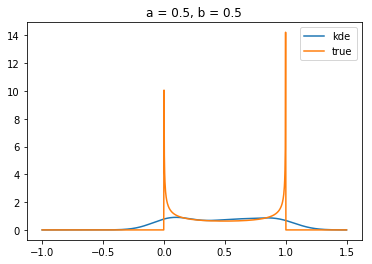

In [3]:
N = 100
x_grid = np.linspace(-1, 1.5, 1000)

for a, b in [(2, 2), (2, 5), (0.5, 0.5)]:
    dist = beta(a, b)
    X = dist.rvs(N)
    k = KDE(X)
    plt.plot(x_grid, k.f(x_grid), label='kde')
    plt.plot(x_grid, dist.pdf(x_grid), label='true')
    plt.title(f'a = {a}, b = {b}')
    plt.legend()
    plt.show()

### Exercise 2

In class we discussed the following fact:  For the $AR(1)$ process

$$ X_{t+1} = \rho X_t + b + \sigma \xi_{t+1} $$

with $\{ \xi_t \}$ iid and standard normal, 

$$ 
    \psi_t = N(\mu, s^2) \implies \psi_{t+1} 
    = N(\rho \mu + b, \rho^2 s^2 + \sigma^2) 
$$

Confirm this, at least approximately, by simulation.  Let

* $\rho = 0.9$
* $b = 0.0$
* $\sigma = 0.1$
* $\mu = -3$
* $s = 0.2$

First, plot $\psi_t$ and $\psi_{t+1}$ using the true distributions described above.

Second, plot $\psi_{t+1}$ on the same figure (in a different color) as follows:

1. Generate $n$ draws of $X_t$ from the $N(\mu, s^2)$ distribution
2. Update them all using the rule $X_{t+1} = \rho X_t + b + \sigma \xi_{t+1}$
3. Use the resulting sample of $X_{t+1}$ values to produce a density estimate via kernel density estimation.

Try this for several different values of $n$ and confirm that the simulation based estimate of $\psi_{t+1}$ does converge to the theoretical distribution.

In [4]:
ρ = 0.9
b = 0.0
σ = 0.1
μ = -3
s = 0.2

In [5]:
Ψ_t = norm(loc=μ, scale=s)  # True Ψ_t
Ψ_t1 = norm(loc=(ρ * μ + b), scale=np.sqrt(ρ**2 * s**2 + σ**2))  # True Ψ_{t+1}

x_grid = np.linspace(μ - 2, μ + 2, 300)

def update_Ψ(N):
    
    plt.figure(figsize=(10, 8))
    plt.plot(x_grid, Ψ_t.pdf(x_grid), label='$\Psi_{t}$')
    plt.plot(x_grid, Ψ_t1.pdf(x_grid), label='$\Psi_{t+1}$')
    
    Ψ_update = ρ * Ψ_t.rvs(size=N) + b + σ * np.random.rand()
    Ψ_kernel = KDE(Ψ_update)
    plt.plot(x_grid, Ψ_kernel.f(x_grid), label='$\hat{\Psi}_{t+1}$')
    
    plt.legend()
    plt.show()

In [6]:
interact(update_Ψ, N=(2, 1000, 10))

interactive(children=(IntSlider(value=492, description='N', max=1000, min=2, step=10), Output()), _dom_classes=('widget-interact',))

<function __main__.update_Ψ>

### Exercise 3

In the lecture it was claimed that, for $n \times n$ matrix $A$, we have

$$ r(A) < 1 \implies A^k \to 0 $$

where convergence is in terms of the spectral norm.  

Prove this using Gelfand's formula.

Gelfrand's formula: 
$$
||A^k||^{1/k} \to r(A)\\
||A^k|| \to [r(A)]^{1/k}
$$

If $r(A) < 1$ and $r(A) \geq 0$ by definition, then $[r(A)]^{1/k} \to 0$ as $k \to \infty$, which implies $||A^k|| \to 0$

This implies that $||A^k - 0|| \to 0$, so $A^k \to 0$.